In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

###### Leemos el fichero y filtramos por paises 
###### 1. Mexico

In [29]:
sharks = pd.read_csv("GSAF5.csv", engine="python")
camposNecesitados = sharks[["Country", "Area", "Location", "Year", "Activity", "Name"]]
mexicoCases = camposNecesitados.loc[camposNecesitados["Country"] == "MEXICO"]
mexicoCases = mexicoCases[mexicoCases["Year"] != 500]
mexicoCases.dropna(subset=["Area"], inplace=True)
mexicoCases["Area"] = mexicoCases.Area.str.lower().str.replace(" ", "").str.capitalize()
eastMexico = ["Sinaloa", "Quintanaroo", "Guerrero", "Colima", "Cabosanlucas", "Guerro", "Bajacalifornia", "Guerrrero", "Guyamas", "Oaxaca"]
for i in eastMexico:
    mexicoCases.drop(mexicoCases[mexicoCases["Area"] == i].index, inplace=True)

###### 2. USA 

In [30]:
usaCases = camposNecesitados.loc[camposNecesitados["Country"] == "USA"]
floridaCases = camposNecesitados.loc[camposNecesitados["Area"] == "Florida"]

###### 3. BAHAMAS 

In [31]:
bahamasCases = camposNecesitados.loc[camposNecesitados["Country"] == "BAHAMAS"]

###### 4. JAMAICA

In [32]:
jamaicaCases = camposNecesitados.loc[camposNecesitados["Country"] == "JAMAICA"]

###### 5. HAITI

In [33]:
haitiCases = camposNecesitados.loc[camposNecesitados["Country"] == "HAITI"]

###### 6. CUBA

In [34]:
cubaCases = camposNecesitados.loc[camposNecesitados["Country"] == "CUBA"]

###### 7. CARIBBEAN SEA

In [35]:
caribeanSeaCases =  camposNecesitados[camposNecesitados["Country"] == "CARIBBEAN SEA"]

###### Juntamos todos los casos

In [36]:
allCases = pd.concat([floridaCases, bahamasCases, jamaicaCases, haitiCases, mexicoCases, cubaCases, caribeanSeaCases]).sort_values(by=["Year"], ascending=False).dropna(how="all")

In [37]:
allCases.Name.drop_duplicates(keep="first").tolist()

['male',
 'Krystal Magee',
 'Michael Dornellas',
 'Henry Kreckman ',
 'Chucky Luciano',
 'Johnny Stoch',
 'Daniel Kenny',
 'Nick Kawa',
 'Maximo Trinidad',
 'Jonathan Lester',
 'Kyle Senkowicz',
 'Kelton Beardall',
 'female',
 'Mark Wilson',
 'Steve Cutbirth',
 'Mary Marcus',
 'Nolan Tyler',
 'Sam Cumiskey ',
 'Austin Moore',
 'David Cassetty',
 'Warren Sapp',
 'Rick Neumann',
 'Ashlyn Gilpin',
 'Dakota Hatfield',
 'Alysa Whetro',
 'Matthew Zaccaria',
 'Carsten Jessen',
 'Mark Rackley',
 '22-ft boat.  Occupant Captain Scott Fitzgerald',
 'Rob Konrad',
 'Lucas Vertullo',
 'Lacy Webb',
 'Katie Hester',
 'Richard Pinder',
 'Josh Green',
 'Gavin Simpson',
 'David Morrison, Jr.',
 'Aaron Conti',
 'Allen Engelman',
 'Ryla Underwood',
 'Jill Kruse',
 'Michael Salinger',
 'Peter Kirn',
 'Phillip Tarasovic',
 'Joshua Bitner, Jr.',
 'Filippo Schiavo ',
 'Peter Vergenz ',
 'Bryan Liebetrau',
 'young boy',
 'Kaley Szarmack',
 'Shawn Warrilow',
 'Jimmy Roseman',
 'Shane Nolet',
 'Justin Davidson',


###### Borramos los años que esten a 0 y juntamos los sucesos por décadas

In [38]:
allCases.drop(allCases[allCases["Year"] == 0].index, inplace=True)
minYear = int(allCases.Year.min())
while str(minYear)[-1] != "9":
    minYear -= 1
allCases["Decades"] = pd.cut(allCases.Year, bins=list(range(minYear, 2020, 10)), labels=list(range(minYear + 1, 2020, 10)))

###### Mostramos los sucesos por décadas

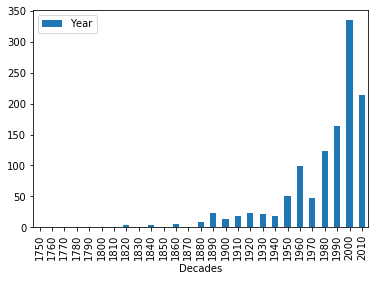

In [39]:
%matplotlib inline
allCases.groupby("Decades").agg({"Year": "count"}).plot.bar()

###### Mostramos los sucesos por países

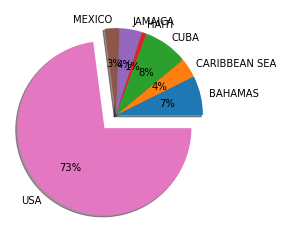

In [70]:
countryCases = allCases.groupby("Country").agg({"Country": "count"})
labels = list(countryCases.Country.index)
size = list(countryCases.Country.values)
sizeNumpy = np.array(size)
explode = [0 for i in range(0, len(labels))] 
explode[-1] = 0.2
plt.pie(sizeNumpy, labels=labels, shadow=True, autopct='%1.0f%%', explode=explode)
plt.show()

###### Redondeamos los años de los sucesos

In [41]:
allCases.Year = allCases.Year.apply(func=int)

###### Filtramos las actividades por semejanza

In [42]:
allCases.Activity.fillna("Unknown", inplace=True)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Surfing" if re.search(r"[Ss]urf", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Fishing" if re.search(r"[Ff]ishing", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Diving" if re.search(r"[Dd]iving", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Swimming" if re.search(r"[Ss]wimming", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Wading" if re.search(r"[Ww]ading", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Jumping" if re.search(r"[Jj]ump", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Playing" if re.search(r"[Pp]lay", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Snorkeling" if re.search(r"[Ss]norkel", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Doing stupid things with Sharks" if re.search(r"[Ss]hark", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Photographing" if re.search(r"[Pp]hoto", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Sea disaster" if re.search(r"[Dd]isaster", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Cool Sports" if re.search(r"[Bb]oarding", x) != None else x)
allCases["Activity"] = allCases.Activity.apply(lambda x: "Floating" if re.search(r"[Ff]loating", x) != None else x)

###### Mostramos las actividades de todos los casos

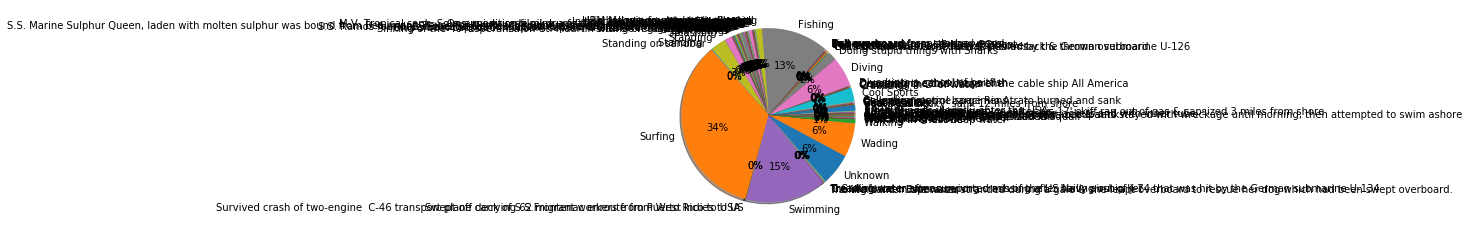

In [43]:
activityCases = allCases.groupby("Activity").agg({"Activity": "count"})
labels = list(activityCases.index)
sizes = np.array([e for i in activityCases.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

###### Mostramos los casos de surfing por décadas

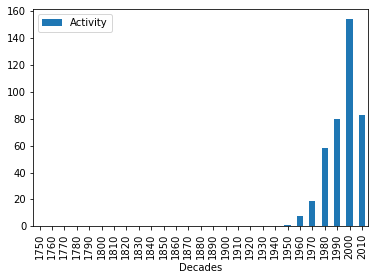

In [44]:
%matplotlib inline
allCases.loc[allCases["Activity"] == "Surfing"].groupby("Decades").agg({"Activity": "count"}).plot.bar()

###### Separamos los casos antes de 1959 (Triunfo de la guerrilla)

In [45]:
casesBefore = allCases.where(allCases.Year < 1959).sort_values(by=["Year"], ascending=False).dropna(how="all").reset_index()

###### Mostramos los sucesos por actividades antes de 1959

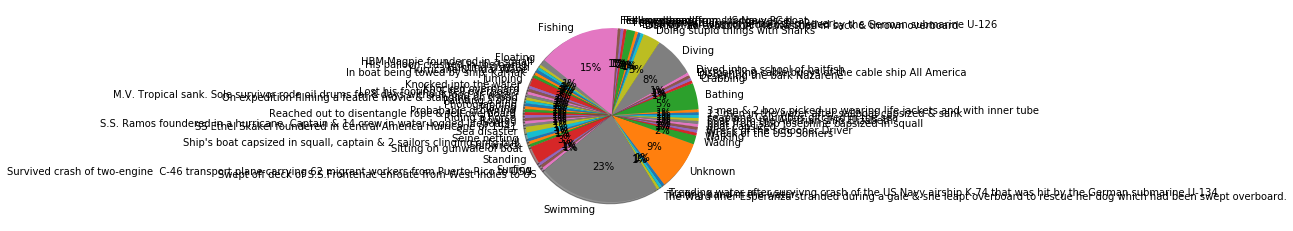

In [46]:
activityCasesBefore = casesBefore.groupby("Activity").agg({"Activity": "count"})
labels = list(activityCasesBefore.index)
sizes = np.array([e for i in activityCasesBefore.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

###### Separamos los casos después de 1959

In [47]:
afterCases = allCases.where(allCases.Year >= 1959).sort_values(by=["Year"], ascending=False).dropna(how="all").reset_index()

###### Mostramos los sucesos por actividades después de 1959

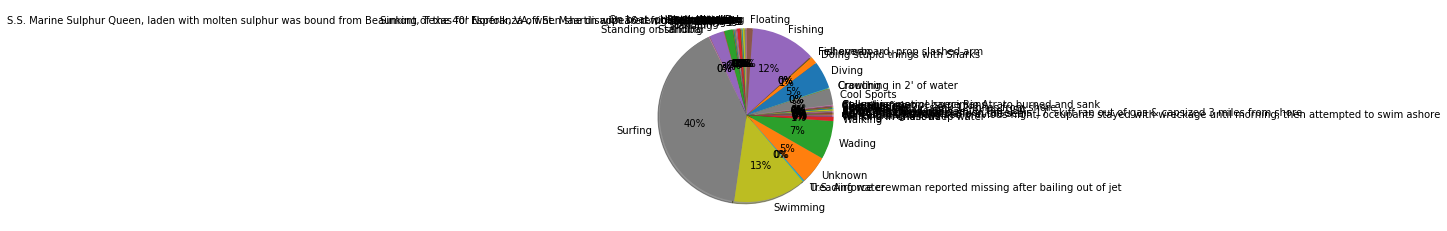

In [48]:
activityCasesAfter = afterCases.groupby("Activity").agg({"Activity": "count"})
labels = list(activityCasesAfter.index)
sizes = np.array([e for i in activityCasesAfter.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

###### Filtramos las actividades que no se corresponden actividades correspondientes

In [71]:
crazyStuff = ["Surfing", "Fishing", "Diving" , "Swimming", "Wading", "Jumping", "Playing", "Snorkeling", "Doing stupid things with Sharks", "Photographing", "Cool Sports", "Bathing"]
filterCases = pd.DataFrame()
filterCases = allCases
for i in crazyStuff:
    filterCases.drop(filterCases[filterCases["Activity"] == i].index, inplace=True)

###### Mostramos el número de sucesos después del filtrado de actividades

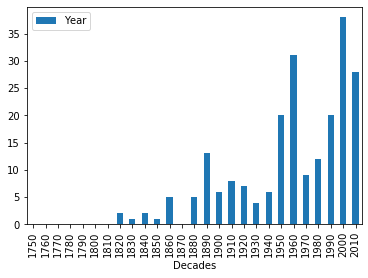

In [50]:
%matplotlib inline
filterCases.groupby("Decades").agg({"Year": "count"}).plot.bar()

###### Mostramos la década de los 60's

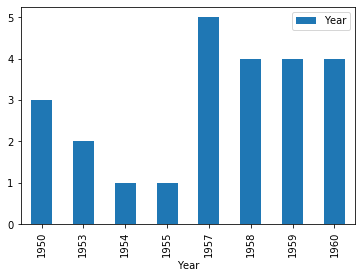

In [68]:
%matplotlib inline
filterCases1960 = filterCases[filterCases['Year'].between(1950, 1960)]
filterCases1960.groupby("Year").agg({"Year": "count"}).plot.bar()

###### Mostramos el porcentaje de las actividades filtradas

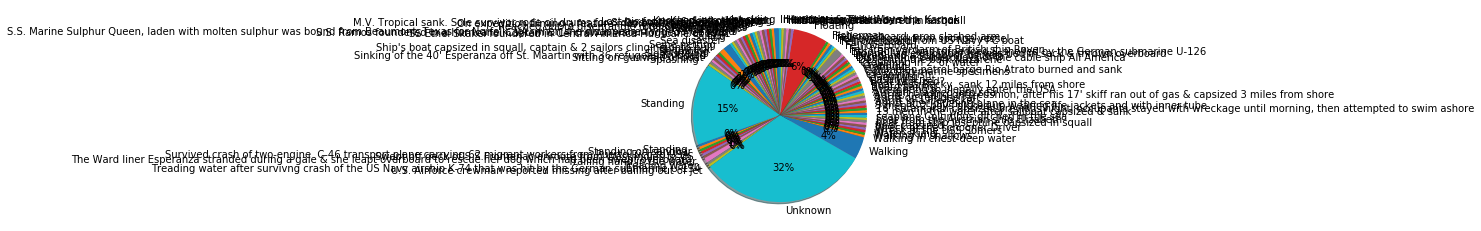

In [51]:
filterCasesActivity = filterCases.groupby("Activity").agg({"Activity": "count"})
labels = list(filterCasesActivity.index)
sizes = np.array([e for i in filterCasesActivity.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

In [52]:
filterCases.Activity.drop_duplicates(keep="first").tolist()

['Unknown',
 'SUP',
 'Lobstering',
 'Standing',
 'Walking',
 'Cleaning fish',
 'Casting a net',
 'Jet skiing',
 'Crawling',
 'Sea disaster',
 'Floating',
 'Shrimping',
 "Crouching in 2' of water",
 'Walking in shallows',
 "Sinking of the 40' Esperanza off St. Maartin with 36 refugees on board",
 'Sailing',
 'Attempting to illegally enter the USA',
 'Adrift in a life jacket',
 'Adrift on refugee raft',
 '   ',
 'Fisherman',
 'Board sailing',
 'Standing ',
 'Adrift after ditching plane in the sea',
 'Boat capsized?',
 'Water-skiing',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 'Kayaking',
 'Sight-seeing',
 'Treading water',
 'Clamming',
 'Standing on sandbar',
 'Hunting crayfish ',
 'Collecting marine specimens',
 'Boat Miss Becky  sank 12 miles from shore',
 'S.S. Marine Sulphur Queen, laden with molten sulphur was bound from Beaumont, Texas for Norfolk, VA, when she disappeared with 39 on board',
 'U.S. Airforc

###### Separamos por sucesos antes de 1959

In [53]:
filterCasesBefore = filterCases.where(filterCases.Year < 1959).sort_values(by=["Year"], ascending=False).dropna(how="all").reset_index()

###### Mostramos las actividades antes de 1959

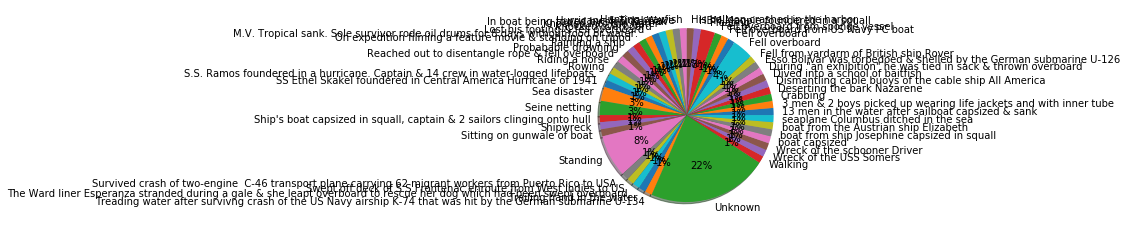

In [72]:
filterCasesActivityBefore = filterCasesBefore.groupby("Activity").agg({"Activity": "count"})
labels = list(filterCasesActivityBefore.index)
sizes = np.array([e for i in filterCasesActivityBefore.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

###### Separamos por sucesos después de 1959

In [55]:
filterCasesAfter = filterCases.where(filterCases.Year >= 1959).sort_values(by=["Year"], ascending=False).dropna(how="all").reset_index()

###### Mostramos las actividades después de 1959

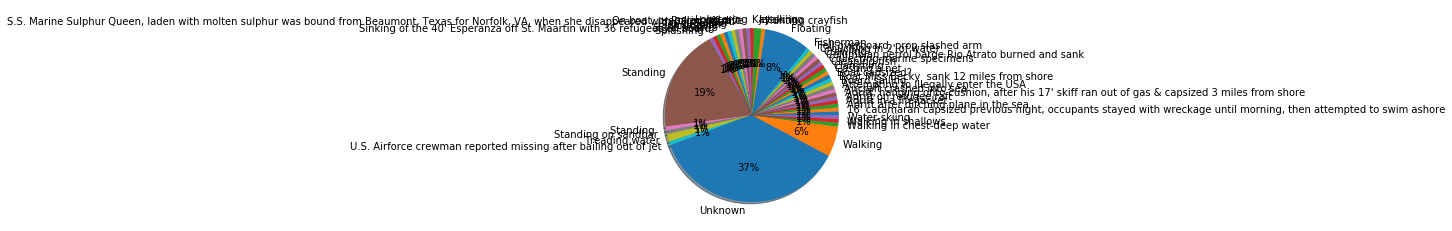

In [56]:
filterCasesActivityAfter = filterCasesAfter.groupby("Activity").agg({"Activity": "count"})
labels = list(filterCasesActivityAfter.index)
sizes = np.array([e for i in filterCasesActivityAfter.values for e in i])
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.0f%%')
plt.show()

###### Mostramos los sucesos por zonas después del filtrado de actividades 

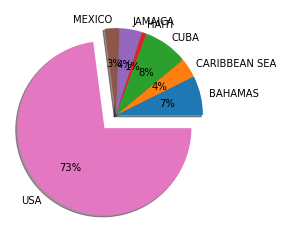

In [69]:
countryCasesFilter = filterCases.groupby("Country").agg({"Country": "count"})
labels = list(countryCasesFilter.Country.index)
size = list(countryCasesFilter.Country.values)
sizeNumpy = np.array(size)
explode = [0 for i in range(0, len(labels))] 
explode[6] = 0.2
plt.pie(sizeNumpy, labels=labels, shadow=True, autopct='%1.0f%%', explode=explode)
plt.show()

In [77]:
filterCases1960 = filterCases.loc[filterCases["Activity"] == "Unknown", "Name"]
filterCases1960.values.tolist()

['Henry Kreckman ',
 'male',
 'Nick Kawa',
 'female',
 'male',
 'young boy',
 'child',
 'male',
 'male',
 'Kevin',
 'boy',
 'female',
 'male',
 'Dylan Hapworth',
 'female',
 'male',
 'Alicia',
 'male',
 'male',
 'male',
 'Jessica Abe',
 'Todd Rapp',
 'Michaela Grogan',
 'male',
 'male',
 'female',
 'male',
 'male',
 'Mike Duncan',
 'Gerd Olofsson',
 'Andrew Lewis',
 'Mark Degraff',
 'C.M.',
 'Jerry McInarnay',
 nan,
 'Roger Yost',
 'male',
 'Tara Dean',
 nan,
 'Walter Griffin',
 'Steven Samples',
 'John DeBry',
 'rowboat, occupants: refugees fleeing Cuba',
 'Morris M. Vorenberg',
 'Miguel Salas Gonzalez',
 "21' boat sank. Occupants: Max Butcher, George Hardy & Peter Thorne",
 'boy',
 'Jacob Horn',
 'Paul Walter',
 'British sailor from the  F-107',
 "16' skiff, occupant: W.A. Starck, II",
 'June Goldback',
 'Lytton Evans',
 'Angel B. Escartin',
 '2 males admitted to Memorial Hospital emergency room this month',
 'an infant',
 '2 incidents north of Vero Beach',
 'a marine biology student